## Bradley-Terry model tests

On va d'abord tenter de produire des données factices: on associe à chaque joueur sa force

In [20]:
import numpy as np

X = np.random.normal(0, 6, size=100)
X = (X - np.min(X)) / (np.max(X) - np.min(X))

X.sort()

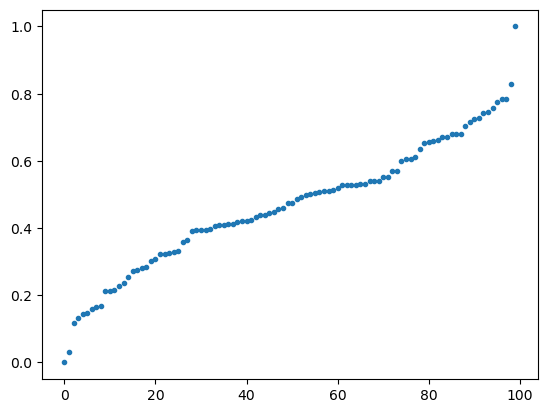

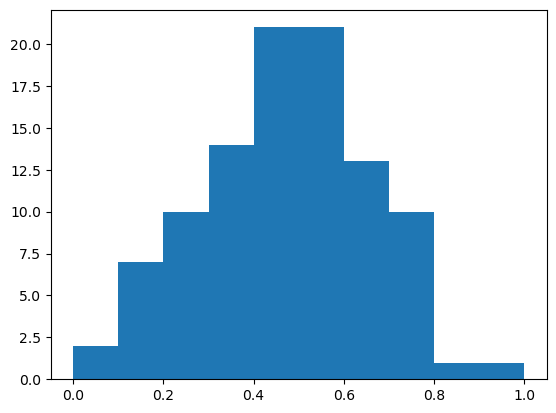

In [21]:
import matplotlib.pyplot as plt

plt.plot(X,'.')
plt.show()
plt.hist(X)
plt.show()

In [12]:
def BT_proba(Vi,Vj):
    return Vi/(Vi+Vj)

def BT_score(i,X):
    Vi = X[i]
    Score = 0
    for j in range(len(X)):
        if i != j:
            Vj = X[j]
            proba = BT_proba(Vi,Vj)
            Score += np.random.binomial(1,proba)
    return Score

def BT_tournament(X):
    Scores = []
    for i in range(len(X)):
        Scores.append(BT_score(i,X))
    winner = Scores.index(max(Scores))
    return Scores, winner


In [25]:
print(BT_score(0,X))
print(BT_tournament(X))

0
([0, 3, 20, 19, 25, 27, 35, 28, 29, 31, 40, 45, 36, 37, 33, 37, 49, 41, 44, 43, 45, 34, 51, 43, 49, 37, 44, 42, 48, 52, 51, 51, 38, 54, 50, 48, 52, 51, 44, 53, 43, 48, 59, 55, 50, 47, 53, 51, 52, 52, 52, 67, 56, 59, 58, 64, 54, 47, 58, 55, 59, 58, 56, 63, 58, 52, 45, 56, 63, 66, 55, 57, 53, 43, 66, 58, 63, 55, 57, 56, 60, 57, 63, 56, 51, 55, 69, 59, 51, 67, 64, 59, 61, 63, 70, 58, 55, 72, 67, 62], 97)


## Sur un jeu de données d'un tournoi réel

In [27]:
import pandas as pd
import requests

ligue1 = pd.read_csv('https://raw.githubusercontent.com/datasets/football-datasets/refs/heads/main/datasets/ligue-1/season-0001.csv')
ligue1

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,28/07/00,Marseille,Troyes,3,1,H,2,1,H,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,28/07/00,Paris SG,Strasbourg,3,1,H,1,1,D,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,29/07/00,Auxerre,Sedan,0,1,A,0,1,A,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,29/07/00,Bordeaux,Metz,1,1,D,1,0,H,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,29/07/00,Guingamp,St Etienne,2,2,D,2,1,H,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,19/05/01,Rennes,Lyon,3,4,A,3,2,H,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
302,19/05/01,Sedan,Auxerre,1,0,H,1,0,H,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
303,19/05/01,St Etienne,Guingamp,2,2,D,1,0,H,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
304,19/05/01,Strasbourg,Paris SG,1,2,A,0,0,D,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
